In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
property_dict = {
    "A": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "R": ["Polar", "Positive", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "N": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'NonIonizable'],
    "D": ["Polar", "Negative", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "C": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "Q": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'NonIonizable'],
    "E": ["Polar", "Negative", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "G": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "H": ["Polar", "Positive", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "I": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "L": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "K": ["Polar", "Positive", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "M": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "F": ["NonPolar", 'Neutral', 'Hydrophobic', "Aromatic", 'NonIonizable'],
    "P": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "S": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'NonIonizable'],
    "T": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'NonIonizable'],
    "W": ["NonPolar", 'Neutral', 'Hydrophobic', "Aromatic", 'NonIonizable'],
    "Y": ["Polar", 'Neutral', 'Hydrophobic', "Aromatic", 'Ionizable'],
    "V": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable']
}

mapping = {'Hydrophobic':0, 'Hydrophilic':1, 'Neutral':0, 'Positive':1, 'Negative':-1, 'Polar':1, 'NonPolar':0, 'Aromatic':1, 'NonAromatic':0, 'Ionizable':1, 'NonIonizable':0}



In [6]:
data_path = "data"

In [57]:
data = pd.read_csv(os.path.join(data_path, "data_linear_features.csv"))

In [58]:
data.head()

,Unnamed: 0,our_id,metadata,position,amino_acid,data,labels
0,0,0,PositiveID_115075,0,m,"[[1, 0, 1, 0, 1], [1, 0, 1, 0, 1], [1, 0, 1, 0...",False
1,1,0,PositiveID_115075,1,a,"[[1, 0, 1, 0, 1], [1, 0, 1, 0, 1], [1, 0, 1, 0...",False
2,2,0,PositiveID_115075,2,s,"[[1, 0, 1, 0, 1], [1, 0, 1, 0, 1], [0, 0, 0, 0...",False
3,3,0,PositiveID_115075,3,q,"[[1, 0, 1, 0, 1], [0, 0, 0, 0, 0], [0, 0, 0, 0...",False
4,4,0,PositiveID_115075,4,k,"[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 1, 0...",False


In [59]:
def get_train_test(df, train_size, test_size, val_size):
    # first select train and test samples
    inds = np.random.permutation(len(np.unique(df["our_id"])))
    train_inds = inds[:int(train_size*len(inds))]
    test_inds = inds[int(train_size*len(inds)): int(train_size*len(inds))+int(test_size*len(inds))]
    val_inds = inds[int(train_size*len(inds))+int(test_size*len(inds)):]
    
    train_data = df[df['our_id'].isin(train_inds)]
    test_data = df[df['our_id'].isin(test_inds)]
    val_data = df[df['our_id'].isin(val_inds)]

    x_train = np.array([eval(d) for d in train_data["data"].values])
    y_train = np.array(train_data["labels"])
    x_test = np.array([eval(d) for d in test_data["data"].values])
    y_test = np.array(test_data["labels"])
    x_val = np.array([eval(d) for d in val_data["data"].values])
    y_val = np.array(val_data["labels"])

    print("number of protein sequences:", len(train_inds), len(test_inds), len(val_inds))
    print("train:", x_train.shape, y_train.shape,"val:", x_val.shape, y_val.shape, "test:", x_test.shape, y_test.shape)
    return x_train, y_train, x_val, y_val, x_test, y_test, train_data, test_data, val_data

In [60]:
train_size = 0.7
test_size = 0.2
val_size = 0.1
x_train, y_train, x_val, y_val, x_test, y_test, train_data, test_data, val_data = get_train_test(data, train_size, test_size, val_size)

KeyboardInterrupt: 

### Train sklearn models

In [11]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score

In [55]:
# define model with class weights for unbalanced
clf = RandomForestRegressor(max_depth=30)
# clf = RandomForestClassifier(max_depth=10, random_state=0, class_weight={0: 1, 1:5})
# clf = SVR()

In [56]:
clf.fit(x_train.reshape(len(x_train), 45), y_train)

# print(clf.feature_importances_)
# print(clf.predict([[0, 0, 0, 0]]))

ValueError: cannot reshape array of size 13208210 into shape (2641642,45)

In [24]:
out = clf.predict(x_val.reshape(len(x_val), 45))

In [15]:
def split_bal_acc(gt, pred):
    gt_1 = gt[gt==1]
    pred_1 = pred[gt==1]
    gt_0 = gt[gt==0]
    pred_0 = pred[gt==0]
    print("accuracy for gt 1:", accuracy_score(gt_1, pred_1))
    print("accuracy for gt 0:", accuracy_score(gt_0, pred_0))

In [50]:
accuracy_score(y_val, out>0.2), balanced_accuracy_score(y_val, out>0.2)

(0.8098159509202454, 0.5669374068554396)

In [25]:
# print("accuracy:", accuracy_score(y_val, out), "balanced:", balanced_accuracy_score(y_val, out))
print("roc auc:", roc_auc_score(y_val, out)) # [:,1]

roc auc: 0.6380990073953265


In [ ]:
split_bal_acc(y_val, out[:,1])

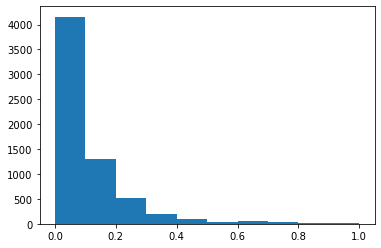

In [55]:
plt.hist(out)
plt.show()

### Moving average - get epitope candidates

In [28]:
corr_sequ = val_data["our_id"]

In [31]:
_, counts = np.unique(corr_sequ, return_counts=True)

In [45]:
EPI_LEN = 3

250 251


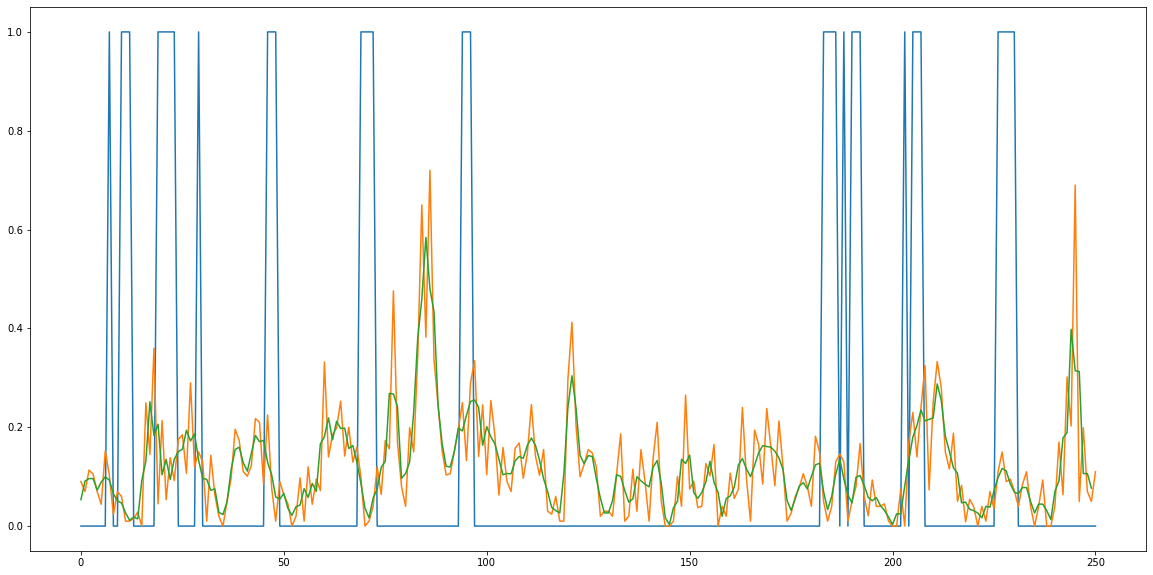

316 317


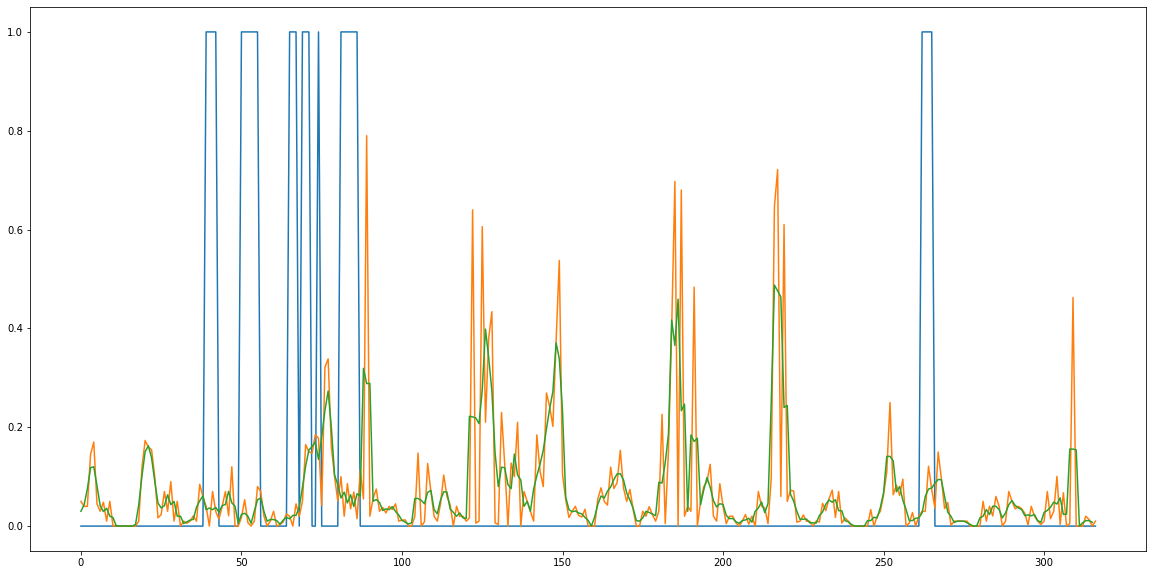

305 306


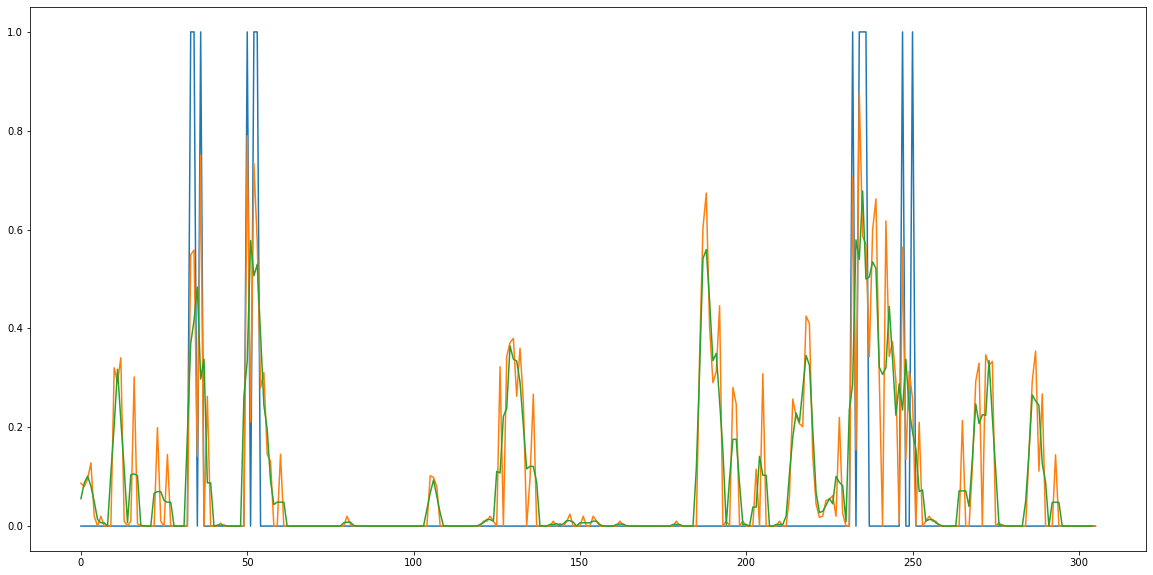

In [46]:
cum_count = 0
smooth_filter = [1 for _ in range(EPI_LEN)]
for c in counts[:3]:
    sequ_out = out[cum_count:cum_count+c]
    gt = y_val[cum_count:cum_count+c]
    cum_count += c
    smoothed_sequ = (np.convolve(sequ_out, smooth_filter) / EPI_LEN)[EPI_LEN//2:-EPI_LEN//2]
    print(len(smoothed_sequ), len(sequ_out))
    plt.figure(figsize=(20,10))
    plt.plot(gt, label="gt")
    plt.plot(sequ_out)
    plt.plot(smoothed_sequ)
    plt.show()

### Train XGBoost

In [114]:
import xgboost as xgb

In [118]:
xgb_model = xgb.XGBRegressor(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train.reshape(len(x_train), 45), y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='binary:logistic', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [119]:
out = xgb_model.predict(x_val.reshape(len(x_val), 45))

In [120]:
print("roc auc:", roc_auc_score(y_val, out)) # [:,1]

roc auc: 0.5728449904731904


### Train keras CNN

In [13]:
from tensorflow import keras

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D

/Users/ninawiedemann/miniconda3/envs/covid_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ninawiedemann/miniconda3/envs/covid_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ninawiedemann/miniconda3/envs/covid_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/nin

In [111]:
window_size = 9
n_features = 5

epochs = 20
batch_size = 16

class_weight = {0: 1., 1: 2.}

In [87]:
# normalize with general mean and std
train_mean = np.mean(x_train)
train_std = np.std(x_train)
x_train_norm = (x_train-np.mean(x_train))/ np.std(x_train)
x_val_norm = (x_val-train_mean)/train_std

In [88]:
# normalize per feature
means = np.mean(np.mean(x_train, axis=0), axis=0)
stds = np.mean(np.std(x_train, axis=0), axis=0)
x_train_std = (x_train - means)/stds
x_val_std = (x_val - means)/stds
x_test_std = (x_test - means)/stds

In [112]:
# START CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))
# model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(56, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [113]:
model.fit(x_train_norm, y_train, epochs=epochs, batch_size=batch_size) # , class_weight=class_weight)

Epoch 1/20
41994/41994 [==============================] - 9s 221us/sample - loss: 0.0827 - acc: 0.9132
Epoch 2/20
41994/41994 [==============================] - 9s 212us/sample - loss: 0.0804 - acc: 0.9134
Epoch 3/20
41994/41994 [==============================] - 8s 182us/sample - loss: 0.0801 - acc: 0.9134
Epoch 4/20
41994/41994 [==============================] - 7s 173us/sample - loss: 0.0799 - acc: 0.9134
Epoch 5/20
41994/41994 [==============================] - 8s 179us/sample - loss: 0.0797 - acc: 0.9134
Epoch 6/20
41994/41994 [==============================] - 9s 217us/sample - loss: 0.0795 - acc: 0.9134
Epoch 7/20
41994/41994 [==============================] - 8s 201us/sample - loss: 0.0795 - acc: 0.9134s
Epoch 8/20
41994/41994 [==============================] - 11s 262us/sample - loss: 0.0793 - acc: 0.9134
Epoch 9/20
41994/41994 [==============================] - 9s 220us/sample - loss: 0.0792 - acc: 0.9134
Epoch 10/20
41994/41994 [==============================] - 8s 201us/sam

In [107]:
# evaluate model
_, accuracy = model.evaluate(x_val_norm, y_val, batch_size=batch_size, verbose=0)
print("accuracy", accuracy)

accuracy 0.9132058


In [108]:
out = model.predict(x_val_norm)

In [36]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score

In [109]:
roc_auc_score(y_val, out)

0.5381542470157368

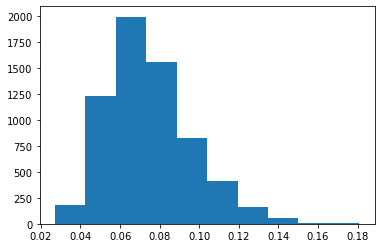

In [110]:
plt.hist(out)
plt.show()

## Train seq to seq CNN

In [13]:
from sklearn.model_selection import train_test_split
def get_split_sequences(x,y, test_size = 0.1, val_size = 0.1):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=1)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=1)
    return x_train,  y_train, x_val, y_val, x_test, y_test

def get_data_from_csv(seq_csv_name, pad=True, pad_max_len=400, test_size = 0.1, val_size = 0.1):
    df = pd.read_csv(seq_csv_name)
    x = [eval(d) for d in df["data"]]
    y = [eval(lab) for lab in df["labels"]]
    if pad:
        x, y = pad_seq(x,y, max_len=pad_max_len)
    # print(y.shape, [len(y_o) for y_o in y])
    return get_split_sequences(x, y, test_size = test_size, val_size = val_size)

def pad_seq(seq_data, seq_labels, pad_val=-1, max_len=None):
    if max_len is None:
        lens = np.array([len(seq) for seq in seq_data])
        max_len = np.max(lens)
    for i in range(len(seq_data)):
        pad_len = max_len-len(seq_data[i])
        if pad_len>0:
            padding = np.array([[pad_val for _ in range(5)] for _ in range(pad_len)])
            # print(s.shape, padding.shape)
            seq_data[i] = np.concatenate([seq_data[i], padding], axis=0)
            seq_labels[i] = list(seq_labels[i]) + [-1 for _ in range(pad_len)]
        elif pad_len<0:
            seq_data[i] = seq_data[i][:max_len]
            seq_labels[i] = seq_labels[i][:max_len]
    return np.array(seq_data), np.array(seq_labels)

def pad_seq_data(seq_data, pad_val=-1, max_len=None):
    if max_len is None:
        lens = np.array([len(seq) for seq in seq_data])
        max_len = np.max(lens)
    new_seq = []
    for i in range(len(seq_data)):
        pad_len = max_len-len(seq_data[i])
        if pad_len>0:
            padding = np.array([[pad_val for _ in range(5)] for _ in range(pad_len)])
            # print(s.shape, padding.shape)
            seq_data[i] = np.concatenate([seq_data[i], padding], axis=0).tolist()
        elif pad_len<0:
            seq_data[i] = list(seq_data[i][:max_len])
        new_seq.append(seq_data[i])
    return np.array(new_seq)

In [250]:
x_train,  y_train, x_val, y_val, x_test, y_test = get_data_from_csv(os.path.join("data", "data_sequences.csv"))

In [253]:
x_train.shape, y_train.shape

((209, 400, 5), (209, 400))

## Train seq predictive model

In [3]:
linear_df = pd.read_csv("data/linear_data_seq.csv")
data = np.array([eval(d) for d in linear_df["data"]])
labels = linear_df["labels"].values
lens = np.array([len(d) for d in data])
plt.hist(lens)
plt.show()

In [4]:
linear_df.head()

,Unnamed: 0,metadata,labels,sequence,epi,data
0,0,D_115075,1,masqkrpsqrhgskylatastmdharhgflprhrdtgildsigrff...,KSHGRTQDENPVVHFFKNIVTPRT,"[[1, 1, 1, 0, 1], [1, 0, 1, 0, 0], [1, 1, 1, 0..."
1,1,D_29205,1,msdltdiqeditrheqqlIVARQKLKDAERAVevdpddvnkntlqa...,IVARQKLKDAERAV,"[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0..."
2,2,D_84423,1,maegfaanrqwigpeeaeelldfdiaiqmneegplnpgvnpfrvpg...,KKGLQQLQEWEDWVGWIGN,"[[1, 1, 1, 0, 1], [1, 1, 1, 0, 1], [0, 0, 0, 0..."
3,3,D_119229,1,mskkpggpgksravnmlkrgmprvlsltglkramlslidgrgptrf...,KHARKERNITGGH,"[[1, 1, 1, 0, 1], [1, 1, 1, 0, 1], [0, 0, 0, 0..."
4,4,D_30333,1,mklliltclvavalarpkhpikhqglpqevlnenllrffvapfpev...,KEDVPSERYL,"[[1, 1, 1, 0, 1], [1, -1, 1, 0, 1], [1, -1, 1,..."


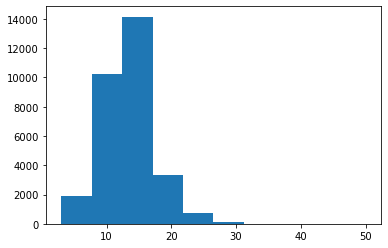

In [8]:
plt.hist(lens)
plt.show()

In [9]:
data = data[lens<30]
labels = labels[lens<30]

In [10]:
len(labels), len(data), len(linear_df) # slightly more if considering sequences above 30

(30396, 30396, 30556)

In [14]:
MAX_SEQ_LEN = 30
data = pad_seq_data(data, max_len=MAX_SEQ_LEN, pad_val=-2)
data.shape, len(labels)

((30396, 30, 5), 30396)

In [16]:
def get_train_test_linear(data, labels, train_size, test_size, val_size):
    # first select train and test samples
    inds = np.random.permutation(len(data))
    train_inds = inds[:int(train_size*len(inds))]
    test_inds = inds[int(train_size*len(inds)): int(train_size*len(inds))+int(test_size*len(inds))]
    val_inds = inds[int(train_size*len(inds))+int(test_size*len(inds)):]
    
    x_train = data[train_inds]
    y_train = labels[train_inds]
    x_test = data[test_inds]
    y_test = labels[test_inds]
    x_val = data[val_inds]
    y_val = labels[val_inds]

    print("number of protein sequences:", len(train_inds), len(test_inds), len(val_inds))
    print("train:", x_train.shape, y_train.shape,"val:", x_val.shape, y_val.shape, "test:", x_test.shape, y_test.shape)
    return x_train, y_train, x_val, y_val, x_test, y_test

#### 0-1-normalization

In [18]:
data = (data-np.min(data))/ (np.max(data)-np.min(data))

In [19]:
x_train, y_train, x_val, y_val, x_test, y_test = get_train_test_linear(data, labels, 0.8, 0.1, 0.1)

number of protein sequences: 24316 3039 3041
train: (24316, 30, 5) (24316,) val: (3041, 30, 5) (3041,) test: (3039, 30, 5) (3039,)


### Train CNN to predict label of linear epitopes

In [38]:
from tensorflow.keras import optimizers
from sklearn.metrics import roc_auc_score, accuracy_score

In [23]:
# START CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(MAX_SEQ_LEN,5)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(Dropout(0.2))
# model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(56, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [50]:
# evaluate model
epochs = 40
batch_size = 64
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size) # , class_weight=class_weight)

Train on 24316 samples, validate on 3041 samples
Epoch 1/40
24316/24316 [==============================] - 3s 138us/sample - loss: 0.1424 - acc: 0.8044 - val_loss: 0.2261 - val_acc: 0.6698
Epoch 2/40
24316/24316 [==============================] - 3s 139us/sample - loss: 0.1377 - acc: 0.8143 - val_loss: 0.2280 - val_acc: 0.6715
Epoch 3/40
24316/24316 [==============================] - 3s 142us/sample - loss: 0.1340 - acc: 0.8188 - val_loss: 0.2321 - val_acc: 0.6652
Epoch 4/40
24316/24316 [==============================] - 3s 137us/sample - loss: 0.1292 - acc: 0.8274 - val_loss: 0.2392 - val_acc: 0.6501
Epoch 5/40
24316/24316 [==============================] - 3s 138us/sample - loss: 0.1263 - acc: 0.8309 - val_loss: 0.2422 - val_acc: 0.6527
Epoch 6/40
24316/24316 [==============================] - 3s 140us/sample - loss: 0.1218 - acc: 0.8386 - val_loss: 0.2409 - val_acc: 0.6573
Epoch 7/40
24316/24316 [==============================] - 3s 141us/sample - loss: 0.1181 - acc: 0.8450 - val_lo

In [31]:
_, accuracy = model.evaluate(x_val, y_val, batch_size=batch_size, verbose=0)
print("accuracy", accuracy)

accuracy 0.6652417


In [32]:
out = model.predict(x_val)

In [35]:
print("roc auc:", roc_auc_score(y_val, out))

roc auc: 0.6984143042650925


In [39]:
print("acc 1 labels", accuracy_score(y_val[y_val==1], (out[y_val==1]>0.5).astype(int)))
print("acc 0 labels", accuracy_score(y_val[y_val==0], (out[y_val==0]>0.5).astype(int)))

acc 1 labels 0.47794117647058826
acc 0 labels 0.7914144193725922


## Evaluate on our epitopes

In [41]:
epis_sars = np.load("data/epis_sars.npy", allow_pickle=True)
print(len(epis_sars))
epis_sars_data = pad_seq_data(epis_sars, max_len=MAX_SEQ_LEN, pad_val=-2)
norm_epis_sars_data = (epis_sars_data-np.min(epis_sars_data))/(np.max(epis_sars_data)-np.min(epis_sars_data))

299

In [43]:
epis_sars_data = pad_seq_data(epis_sars, max_len=MAX_SEQ_LEN, pad_val=-2)

In [44]:
norm_epis_sars_data = (epis_sars_data-np.min(epis_sars_data))/(np.max(epis_sars_data)-np.min(epis_sars_data))

In [46]:
out_sars = model.predict(norm_epis_sars_data)

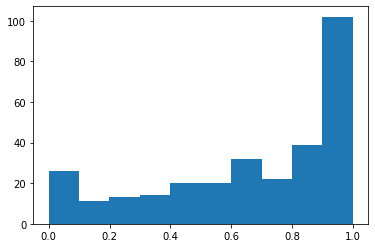

In [47]:
plt.hist(out_sars)
plt.show()

In [48]:
gt_epi_labels = [1 for _ in range(len(epis_sars))]

In [49]:
accuracy_score(gt_epi_labels, (out_sars>0.5).astype(int))

0.7190635451505016